In [155]:
#Dataset Link- https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [156]:
# importing the required library 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [157]:
# Reading the dataframe saved in the system 
df = pd.read_csv(r'C:\Users\Country Head\anaconda3\Hr.csv')

In [158]:
# finding the top 5 columns. 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [159]:
#Attrition is the Target Variable where as all other are the features.

In [160]:
# Checking the shape of the dataframe.
df.shape

(1470, 35)

In [161]:
# printing the number of rows and the columns.
print('Number of columns - ',df.shape[1])
print('Number of rows - ',df.shape[0])

Number of columns -  35
Number of rows -  1470


In [162]:
# finding the same of the missing values. 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

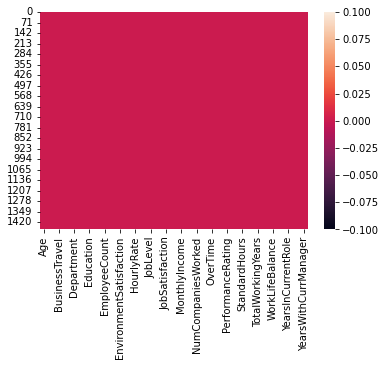

In [163]:
# the project null values in the graphical representation. 
sns.heatmap(df.isnull())

In [164]:
# Checking the describe 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [165]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [166]:
# Presenting the type of data into the frame. 
df.dtypes.to_frame()

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [167]:
#There are two types of data present in the dataframe. i.e Int 64 and object 

In [168]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


Column: Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


Column: BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Column: DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Column: Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Column: DistanceFromHome
2     211
1     208
10 

In [169]:
#Over18, StandardHours and the EmployeeCount remains the same throughout the dataframe. 
df.drop(["Over18","StandardHours","EmployeeCount"],axis=1, inplace=True)

In [170]:
# to check the no. of unique values present in the data. 
df.nunique().to_frame("No. of unique value")


,No. of unique value
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeNumber,1470
EnvironmentSatisfaction,4


In [171]:
df.shape

(1470, 32)

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

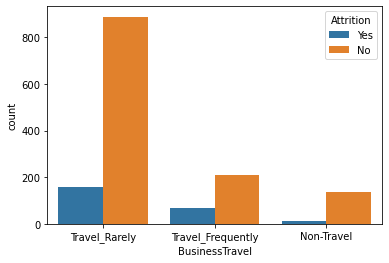

In [172]:
# Checking the realtion of the people who considered Business Travel and the attrition.
sns.countplot('BusinessTravel',hue='Attrition',data= df)

In [173]:
#It is observed that the maximun people fall under the category of Rarely traveling and most of them has low attrition rate. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

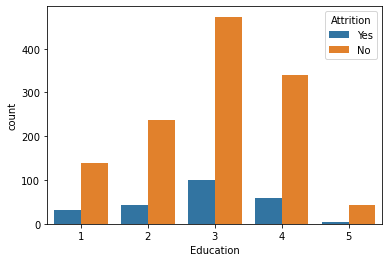

In [174]:
sns.countplot('Education',hue='Attrition',data= df)

In [175]:
#Under the category 3 we see a lot of people under both the heads yes and No 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EducationField', ylabel='count'>

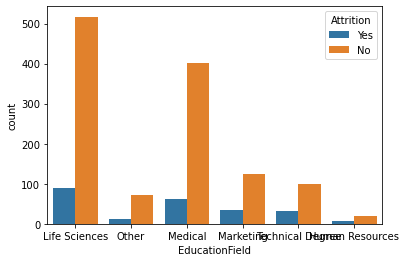

In [176]:
sns.countplot('EducationField',hue='Attrition',data= df)

In [177]:
#Max. no of people are from Life Sceinces however with less of people in Medical feild the attrition is tend to be higher. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

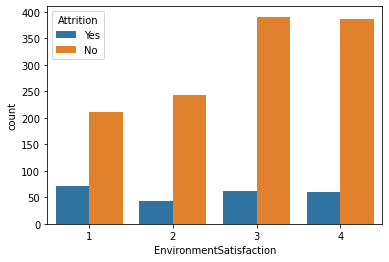

In [178]:
sns.countplot('EnvironmentSatisfaction',hue='Attrition',data= df)

In [179]:
#People with less job satisfaction tend to leave more. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


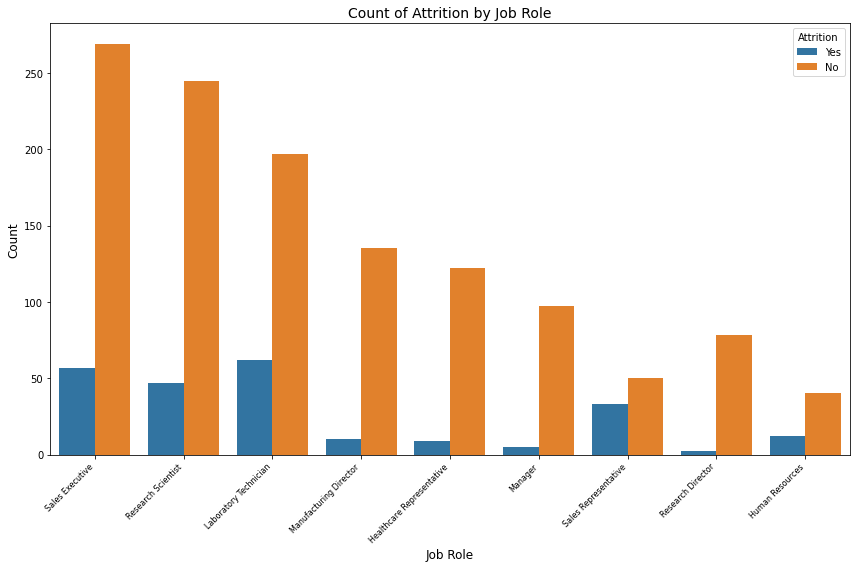

In [180]:
plt.figure(figsize=(12, 8))
ax = sns.countplot('JobRole', hue='Attrition', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Attrition by Job Role', fontsize=14)
plt.tight_layout()
plt.show()

In [181]:
#Max.no  of people are from category 3 but its difficult to specify any trend. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


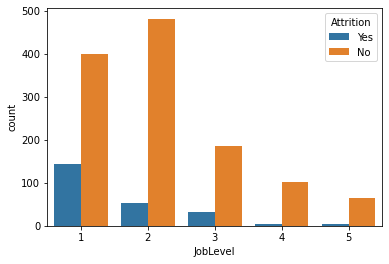

In [182]:
# relationship between JobLevel and the attrition 
ax = sns.countplot('JobLevel', hue='Attrition', data=df)

In [183]:
#Maximum people have considered to move under the Joblevl 1 and the quantum of no. is also the most 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


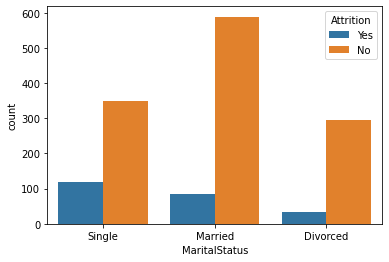

In [184]:
#Relationship of MaritalStatus and the Attritition
ax = sns.countplot('MaritalStatus', hue='Attrition', data=df)

In [185]:
#Single People has the tendency to change the job the most. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


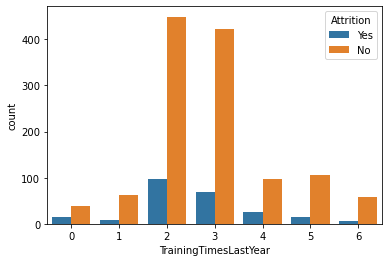

In [186]:
#TrainingTimesLastYear Vs Attrition
ax = sns.countplot('TrainingTimesLastYear', hue='Attrition', data=df)

In [187]:
#People with 2 trainings have the max. movement. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


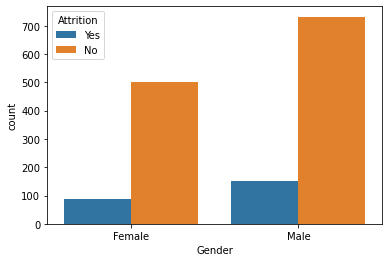

In [188]:
# Relationship of Gender with Attrition
ax = sns.countplot('Gender', hue='Attrition', data=df)

In [189]:
# High Attrition is noticed in Males. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


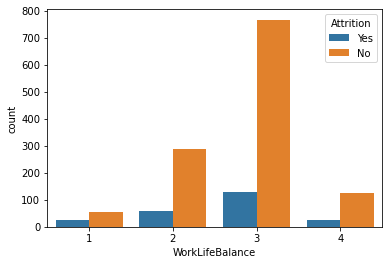

In [190]:
#WorkLifeBalance
ax = sns.countplot('WorkLifeBalance', hue='Attrition', data=df)

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


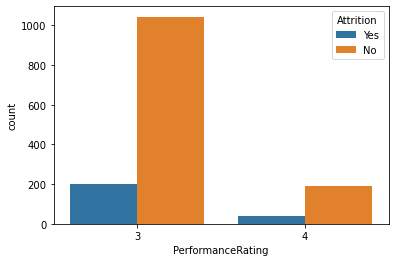

In [191]:
#PerformanceRating Vs the Attrition 
ax = sns.countplot('PerformanceRating', hue='Attrition', data=df)

In [96]:
#Max chunk of people falls under the catergory 3 and follows the almost the same proportionate of Attrition. 

In [192]:
# Displaying the Type: Column, Non-Null Count: 1470 non-null and Dtype : int64,object. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [193]:
#Using the fit_transform method that fits the label encoder to the data and then transforms the data to encoded labels.
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

KeyError: 'Over18'

In [194]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


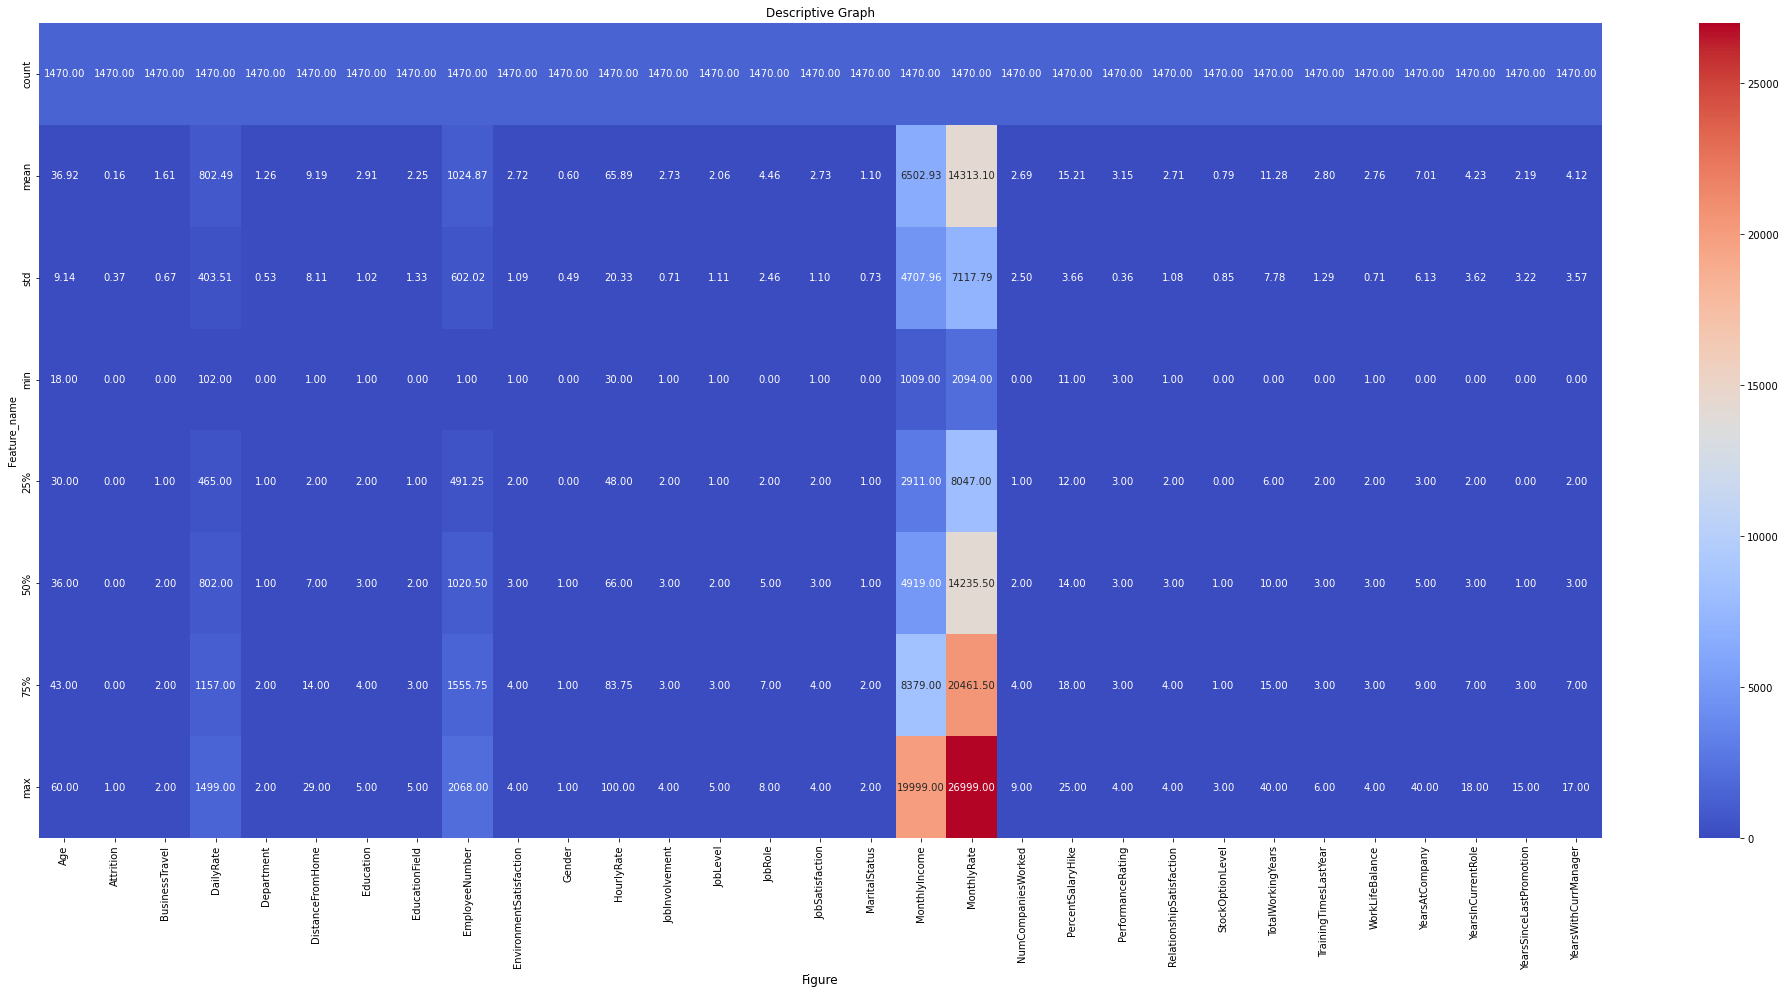

In [195]:
# Plotting the value of the describe feature on the plot 
plt.figure(figsize=(35,15))
sns.heatmap(df.describe(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.2f")
plt.xlabel('Figure', fontsize=12)
plt.ylabel('Feature_name')
plt.title('Descriptive Graph')
plt.show()

In [ ]:
# Checking the correlation of the dataframe. 
df.corr()

In [ ]:
df.describe()

In [ ]:
#Over18, StandardHours and the EmployeeCount remains the same throughout the dataframe. 

In [ ]:
# Checking the skewness of the data. 
df.skew()

In [ ]:
#Positively skewed columns:['Attrition', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Negatively skewed columns:['Education', 'JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance']

In [ ]:
# Checking the distribution of the Target variable. 
sns.histplot(df["Attrition"])

In [ ]:
#finding the correlation of features vs target using corrwith.
df.drop('Attrition',axis=1).corrwith(df.Attrition)

In [ ]:
#Visualize the correlation. 
df.drop('Attrition',axis=1).corrwith(df.Attrition).plot(kind='bar',grid=True,figsize=(10,7),
                                             title="Correlation with Target")

In [ ]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [259]:
k = 15  #to select the number of top features)

# Create the SelectKBest object with the f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=15)

# Fit the selector to the data and transform the features
select_features = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_names = X.columns[feature_mask]

print("Selected Features: ",selected_feature_names)

ValueError: could not convert string to float: 'Travel_Rarely'

In [260]:
X1 = df[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [261]:
X1

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,6,4,5
1,49,8,3,2,2,Research Scientist,2,Married,5130,No,1,10,10,7,7
2,37,2,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,0,0,0
3,33,3,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,8,7,0
4,27,2,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,3,4,2,Laboratory Technician,4,Married,2571,No,1,17,5,2,3
1466,39,6,4,2,3,Healthcare Representative,1,Married,9991,No,1,9,7,7,7
1467,27,4,2,4,2,Manufacturing Director,2,Married,6142,Yes,1,6,6,2,3
1468,49,2,4,2,2,Sales Executive,2,Married,5390,No,0,17,9,6,8


In [262]:
Y1 = Y

In [174]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

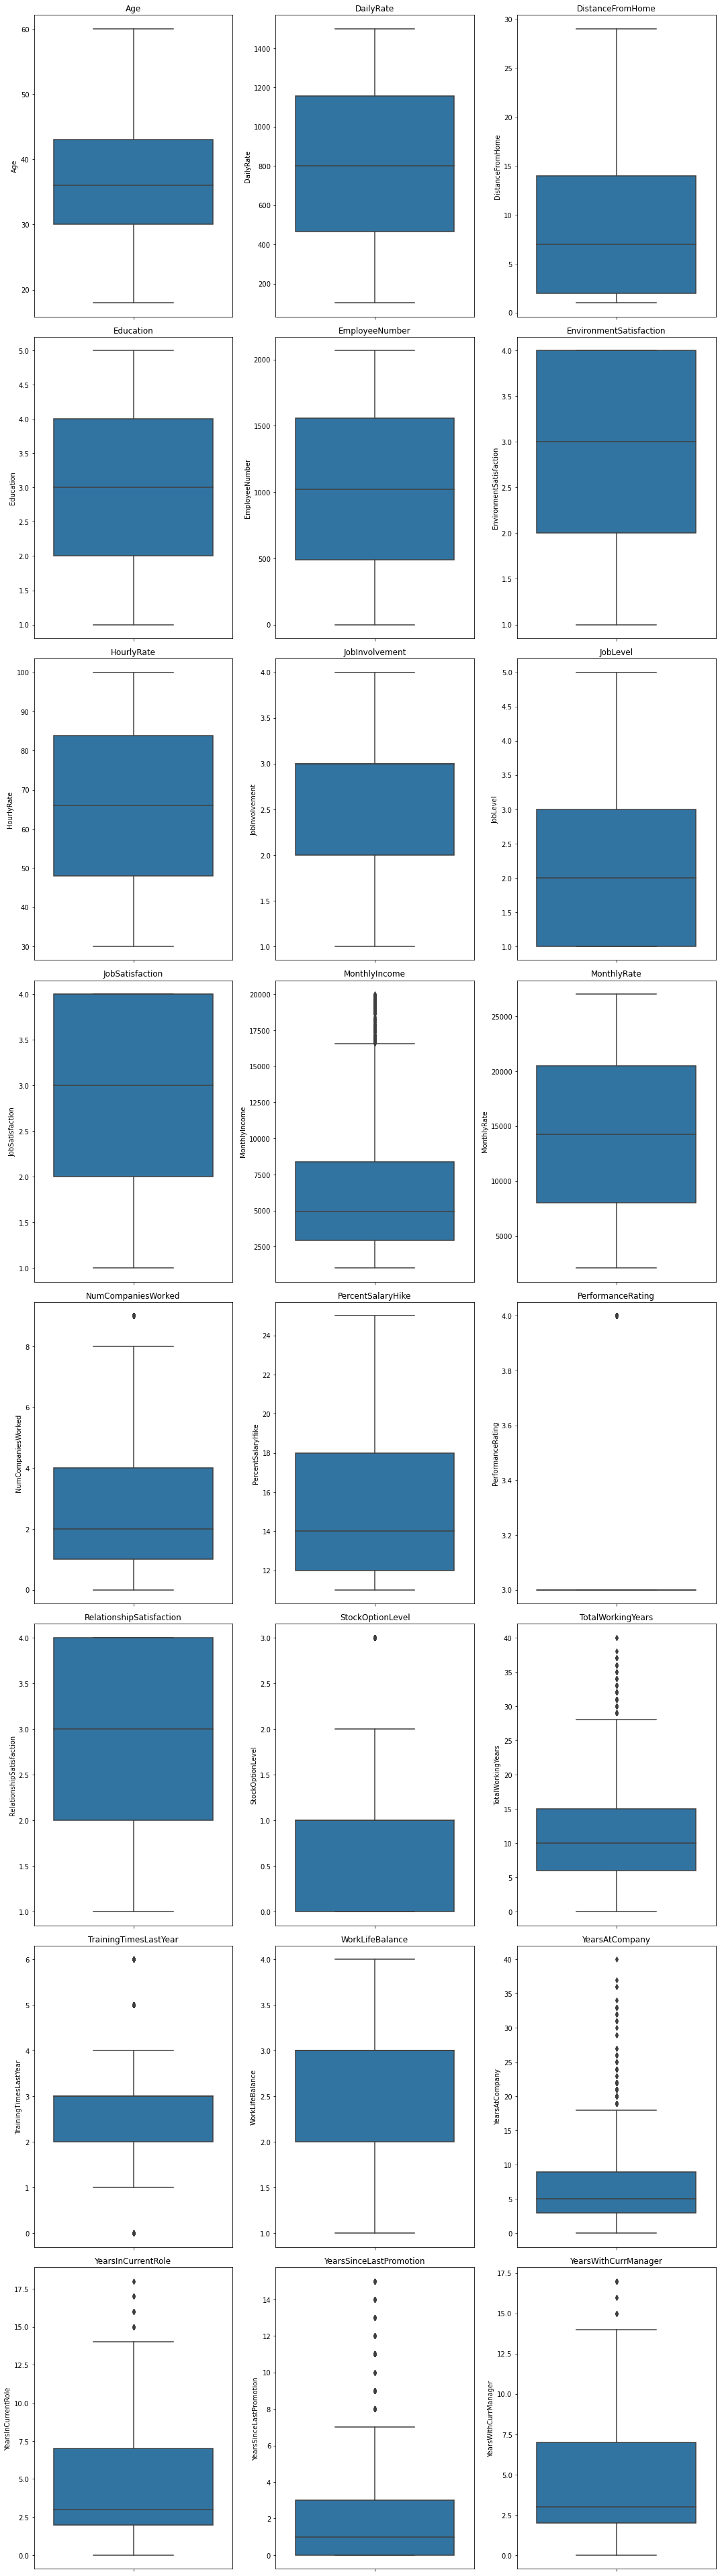

In [143]:
 # checking the outliers
    
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data=df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()

In [144]:
# Features scaling using 
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
x_scaled

NameError: name 'X1' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=22)
X_train  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
logreg_predictions = logreg_model.predict(X_test)
logreg_report = classification_report(y_test, logreg_predictions)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)

# Random Forest
rf_predictions = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_report = classification_report(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)

# Support Vector Machines
svm_predictions = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Print the classification reports and confusion matrices
print("Logistic Regression Report:")
print(logreg_report)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)
print("Random Forest Report:")
print(rf_report)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Gradient Boosting Report:")
print(gb_report)
print("Gradient Boosting Confusion Matrix:")
print(gb_confusion_matrix)
print("Support Vector Machines Report:")
print(svm_report)
print("Support Vector Machines Confusion Matrix:")
print(svm_confusion_matrix)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for each model
lr_param_grid = {'C': [0.1, 1, 10]}
rf_param_grid = {'n_estimators': [100, 200, 500]}
gb_param_grid = {'learning_rate': [0.1, 0.05, 0.01]}
svm_param_grid = {'C': [0.1, 1, 10]}

# Performing grid search for each model
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Printing the best parameters and the corresponding performance scores
print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)

In [ ]:
# Calculating the predicted probabilities for the positive class
y_prob = logreg_model.predict_proba(X_test)[:, 1]

In [145]:
# Calculating the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

NameError: name 'y_test' is not defined

In [215]:
# Calculate the AUC score
auc_score = auc(fpr, tpr)

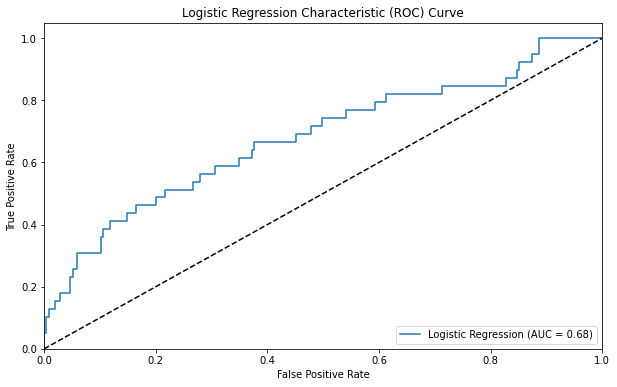

In [216]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [133]:
from joblib import dump

# Creation of the logistic regression model with the best parameters
best_logreg_model = LogisticRegression(C=10)
best_logreg_model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [134]:
# Saving the best logistic regression model
dump(best_logreg_model, 'best_logreg_model.joblib')

['best_logreg_model.joblib']